# PyTorch Quickstart: Training a Simple Neural Network

This notebook demonstrates the basic PyTorch workflow for training a neural network.

**What you'll learn:**
- Define a neural network architecture
- Prepare synthetic training data
- Train the model on GPU
- Evaluate model performance
- Save and load trained models

## 1. Import Libraries and Setup

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

Using device: cuda
GPU: NVIDIA GeForce RTX 4080 SUPER


## 2. Define Neural Network Architecture

We'll create a simple feedforward network with:
- Input layer (784 features - 28x28 images)
- Hidden layer 1 (128 neurons)
- Hidden layer 2 (64 neurons)
- Output layer (10 classes)

In [2]:
class SimpleNN(nn.Module):
    def __init__(self, input_size=784, hidden1=128, hidden2=64, num_classes=10):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Instantiate the model and move to GPU
model = SimpleNN().to(device)
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")

SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Total parameters: 109386


## 3. Generate Synthetic Training Data

For this demo, we'll create synthetic data. In a real project, you'd load actual datasets.

In [3]:
# Generate synthetic data (1000 samples, 784 features each)
num_samples = 1000
input_size = 784
num_classes = 10

# Random input data (simulating flattened 28x28 images)
X_train = torch.randn(num_samples, input_size).to(device)

# Random labels (0-9)
y_train = torch.randint(0, num_classes, (num_samples,)).to(device)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Data on device: {X_train.device}")

Training data shape: torch.Size([1000, 784])
Training labels shape: torch.Size([1000])
Data on device: cuda:0


## 4. Setup Training Configuration

In [4]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training hyperparameters
num_epochs = 50
batch_size = 32

print(f"Loss function: {criterion}")
print(f"Optimizer: {optimizer}")
print(f"Epochs: {num_epochs}")
print(f"Batch size: {batch_size}")

Loss function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Epochs: 50
Batch size: 32


## 5. Training Loop

In [5]:
# Track loss history
loss_history = []

# Training loop
model.train()
for epoch in range(num_epochs):
    epoch_loss = 0.0
    num_batches = 0
    
    # Mini-batch training
    for i in range(0, len(X_train), batch_size):
        # Get batch
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]
        
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        num_batches += 1
    
    # Average loss for the epoch
    avg_loss = epoch_loss / num_batches
    loss_history.append(avg_loss)
    
    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

print("\n✓ Training completed!")

Epoch [10/50], Loss: 0.0065
Epoch [20/50], Loss: 0.0015
Epoch [30/50], Loss: 0.0006
Epoch [40/50], Loss: 0.0004
Epoch [50/50], Loss: 0.0002

✓ Training completed!


## 6. Visualize Training Progress

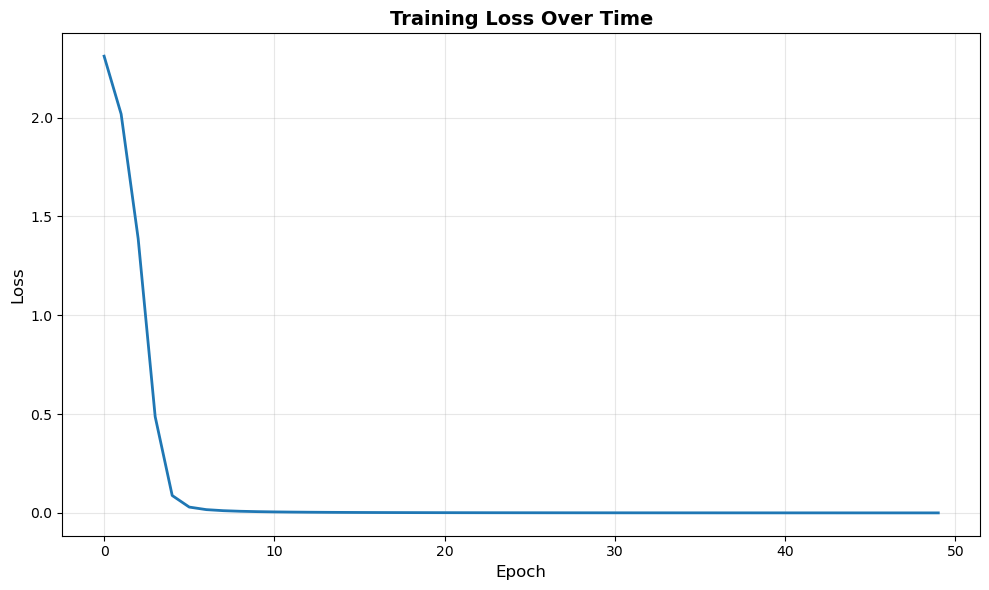

Initial loss: 2.3105
Final loss: 0.0002
Loss reduction: 100.0%


In [6]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history, linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Over Time', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Initial loss: {loss_history[0]:.4f}")
print(f"Final loss: {loss_history[-1]:.4f}")
print(f"Loss reduction: {(1 - loss_history[-1]/loss_history[0]) * 100:.1f}%")

## 7. Evaluate Model Accuracy

In [7]:
# Evaluate on training data (in a real project, use separate test data)
model.eval()
with torch.no_grad():
    outputs = model(X_train)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_train).float().mean()
    
print(f"Training Accuracy: {accuracy * 100:.2f}%")
print(f"\nNote: This is training accuracy. In a real project, evaluate on a separate test set!")

Training Accuracy: 100.00%

Note: This is training accuracy. In a real project, evaluate on a separate test set!


## 8. Save and Load Model

In [8]:
# Save model
model_path = "simple_nn_model.pth"
torch.save(model.state_dict(), model_path)
print(f"✓ Model saved to {model_path}")

# Load model
loaded_model = SimpleNN().to(device)
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.eval()
print(f"✓ Model loaded from {model_path}")

# Verify loaded model
with torch.no_grad():
    test_input = torch.randn(1, 784).to(device)
    output = loaded_model(test_input)
    predicted_class = torch.argmax(output, dim=1)
    print(f"\nTest prediction: Class {predicted_class.item()}")

✓ Model saved to simple_nn_model.pth
✓ Model loaded from simple_nn_model.pth

Test prediction: Class 2


/tmp/ipykernel_439/3451395300.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_path))


## Summary

**What we accomplished:**
- ✅ Defined a neural network architecture
- ✅ Trained the model on GPU
- ✅ Visualized training progress
- ✅ Evaluated model performance
- ✅ Saved and loaded the trained model

**Next steps:**
- Replace synthetic data with real datasets (MNIST, CIFAR-10, etc.)
- Experiment with different architectures (CNNs, RNNs, Transformers)
- Add data augmentation and regularization
- Use tensorboard for advanced visualization
- Try transfer learning with pre-trained models

**Resources:**
- [PyTorch Tutorials](https://pytorch.org/tutorials/)
- [PyTorch Documentation](https://pytorch.org/docs/stable/index.html)